Vamos a ver si un asteroide es peligroso o no, trataremos de predecir la columna Hazardous.

El objetivo sería calcular la curva ROC y tener una matriz de confusión. En la predicción recordad que también podeis utilizar regularización Ridge o Lasso igual que en una regresión lineal

In [20]:
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ───────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [1]:
df_asteroids <- read.csv('./data/nasa_asteroids.csv')

In [2]:
str(df_asteroids)

'data.frame':	4687 obs. of  40 variables:
 $ Neo.Reference.ID            : int  3703080 3723955 2446862 3092506 3514799 3671135 2495323 2153315 2162463 2306383 ...
 $ Name                        : int  3703080 3723955 2446862 3092506 3514799 3671135 2495323 2153315 2162463 2306383 ...
 $ Absolute.Magnitude          : num  21.6 21.3 20.3 27.4 21.6 19.6 19.6 19.2 17.8 21.5 ...
 $ Est.Dia.in.KM.min.          : num  0.1272 0.1461 0.2315 0.0088 0.1272 ...
 $ Est.Dia.in.KM.max.          : num  0.2845 0.3266 0.5177 0.0197 0.2845 ...
 $ Est.Dia.in.M.min.           : num  127.2 146.1 231.5 8.8 127.2 ...
 $ Est.Dia.in.M.max.           : num  284.5 326.6 517.7 19.7 284.5 ...
 $ Est.Dia.in.Miles.min.       : num  0.07905 0.09076 0.14385 0.00547 0.07905 ...
 $ Est.Dia.in.Miles.max.       : num  0.1768 0.203 0.3217 0.0122 0.1768 ...
 $ Est.Dia.in.Feet.min.        : num  417.4 479.2 759.5 28.9 417.4 ...
 $ Est.Dia.in.Feet.max.        : num  933.3 1071.6 1698.3 64.6 933.3 ...
 $ Close.Approach.Date   

In [12]:
df_asteroids$Close.Approach.Date <- as.Date(df_asteroids$Close.Approach.Date)
df_asteroids$Orbit.Determination.Date <- as.POSIXct(df_asteroids$Orbit.Determination.Date)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

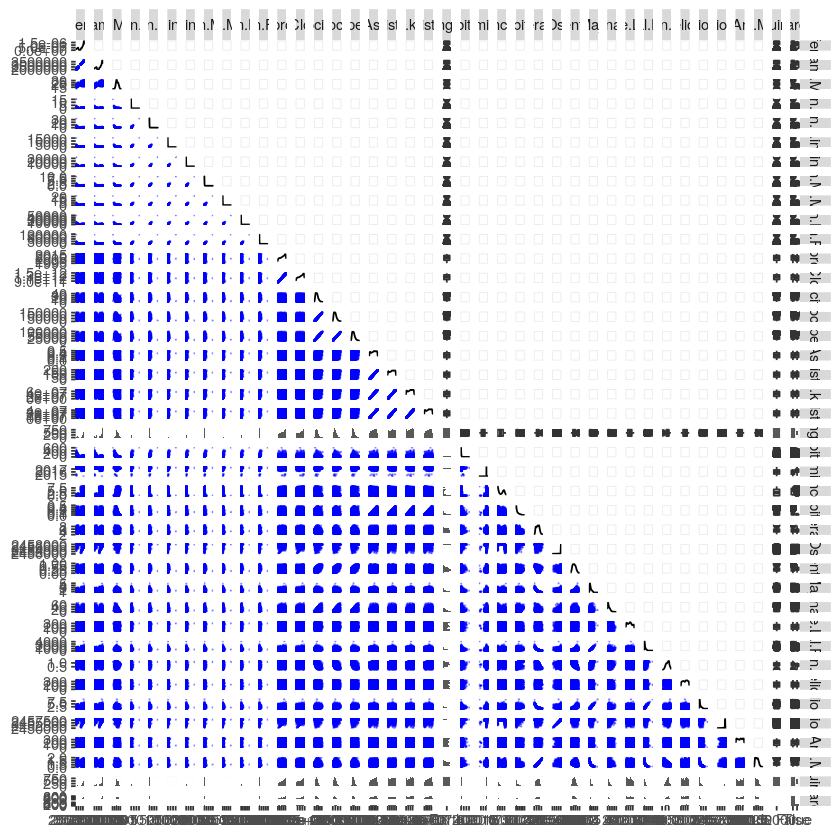

In [13]:
library(GGally)
ggpairs(df_asteroids,     
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [16]:
str(df_asteroids)

'data.frame':	4687 obs. of  40 variables:
 $ Neo.Reference.ID            : int  3703080 3723955 2446862 3092506 3514799 3671135 2495323 2153315 2162463 2306383 ...
 $ Name                        : int  3703080 3723955 2446862 3092506 3514799 3671135 2495323 2153315 2162463 2306383 ...
 $ Absolute.Magnitude          : num  21.6 21.3 20.3 27.4 21.6 19.6 19.6 19.2 17.8 21.5 ...
 $ Est.Dia.in.KM.min.          : num  0.1272 0.1461 0.2315 0.0088 0.1272 ...
 $ Est.Dia.in.KM.max.          : num  0.2845 0.3266 0.5177 0.0197 0.2845 ...
 $ Est.Dia.in.M.min.           : num  127.2 146.1 231.5 8.8 127.2 ...
 $ Est.Dia.in.M.max.           : num  284.5 326.6 517.7 19.7 284.5 ...
 $ Est.Dia.in.Miles.min.       : num  0.07905 0.09076 0.14385 0.00547 0.07905 ...
 $ Est.Dia.in.Miles.max.       : num  0.1768 0.203 0.3217 0.0122 0.1768 ...
 $ Est.Dia.in.Feet.min.        : num  417.4 479.2 759.5 28.9 417.4 ...
 $ Est.Dia.in.Feet.max.        : num  933.3 1071.6 1698.3 64.6 933.3 ...
 $ Close.Approach.Date   

In [27]:
df_asteroids %>% select(-Orbiting.Body, -Neo.Reference.ID, -Name,-Close.Approach.Date,
                        -Epoch.Date.Close.Approach,-Orbiting.Body, -Equinox,
                        -Hazardous, -Orbit.Determination.Date )    %>% cor()

,Absolute.Magnitude,Est.Dia.in.KM.min.,Est.Dia.in.KM.max.,Est.Dia.in.M.min.,Est.Dia.in.M.max.,Est.Dia.in.Miles.min.,Est.Dia.in.Miles.max.,Est.Dia.in.Feet.min.,Est.Dia.in.Feet.max.,Relative.Velocity.km.per.sec,⋯,Semi.Major.Axis,Inclination,Asc.Node.Longitude,Orbital.Period,Perihelion.Distance,Perihelion.Arg,Aphelion.Dist,Perihelion.Time,Mean.Anomaly,Mean.Motion
Absolute.Magnitude,1.00000000,-0.61348151,-0.61348151,-0.61348151,-0.61348151,-0.61348151,-0.61348151,-0.61348151,-0.61348151,-0.376852937,⋯,-0.21243669,-0.459631513,-0.0114700607,-0.206774363,8.696649e-02,0.031783752,-0.25616928,-0.115854738,-0.04940106,0.195652077
Est.Dia.in.KM.min.,-0.61348151,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.242140749,⋯,0.12122353,0.259449966,0.0365582551,0.118313719,-7.186551e-02,-0.019577433,0.15183637,0.062167500,0.03145533,-0.104350128
Est.Dia.in.KM.max.,-0.61348151,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.242140749,⋯,0.12122353,0.259449966,0.0365582551,0.118313719,-7.186551e-02,-0.019577433,0.15183637,0.062167500,0.03145533,-0.104350128
Est.Dia.in.M.min.,-0.61348151,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.242140749,⋯,0.12122353,0.259449966,0.0365582551,0.118313719,-7.186551e-02,-0.019577433,0.15183637,0.062167500,0.03145533,-0.104350128
Est.Dia.in.M.max.,-0.61348151,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.242140749,⋯,0.12122353,0.259449966,0.0365582551,0.118313719,-7.186551e-02,-0.019577433,0.15183637,0.062167500,0.03145533,-0.104350128
Est.Dia.in.Miles.min.,-0.61348151,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.242140749,⋯,0.12122353,0.259449966,0.0365582551,0.118313719,-7.186551e-02,-0.019577433,0.15183637,0.062167500,0.03145533,-0.104350128
Est.Dia.in.Miles.max.,-0.61348151,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.242140749,⋯,0.12122353,0.259449966,0.0365582551,0.118313719,-7.186551e-02,-0.019577433,0.15183637,0.062167500,0.03145533,-0.104350128
Est.Dia.in.Feet.min.,-0.61348151,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.242140749,⋯,0.12122353,0.259449966,0.0365582551,0.118313719,-7.186551e-02,-0.019577433,0.15183637,0.062167500,0.03145533,-0.104350128
Est.Dia.in.Feet.max.,-0.61348151,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.242140749,⋯,0.12122353,0.259449966,0.0365582551,0.118313719,-7.186551e-02,-0.019577433,0.15183637,0.062167500,0.03145533,-0.104350128
Relative.Velocity.km.per.sec,-0.37685294,0.24214075,0.24214075,0.24214075,0.24214075,0.24214075,0.24214075,0.24214075,0.24214075,1.000000000,⋯,0.01435080,0.514656720,-0.0213005757,0.017961174,-5.069777e-01,-0.002912747,0.14478170,0.020006097,0.01768524,0.022452466


In [36]:
paste("Número de asteroides únicos:",length(unique(df_asteroids$Name)))
paste("Número de entradas en el dataframe", length(df_asteroids$Name))

[1] "Número de asteroides únicos: 3692"

[1] "Número de entradas en el dataframe 4687"

In [40]:
df_asteroids_uniq <- df_asteroids %>% arrange(desc(Close.Approach.Date)) %>% distinct(Name, .keep_all=T)

In [44]:
table(df_asteroids_uniq$Hazardous)


False  True 
 3116   576 

In [46]:
table(df_asteroids_uniq$Orbit.ID)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  8  22  67 109 116 151 169 192 177 153 167 144 137  99 124 100  94  89  72  78 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
 70  71  55  47  59  52  37  33  43  38  34  34  33  32  24  19  23  35  26  17 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 20  21  15  17  23  11  12  10  21  17  18  12  10  13  14  13  15   7   4   8 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  5   8   4   6   5   6  12  10  12   6   7   7   6   9   7   1   3   7   5   7 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  5   4   5   8   5   1   3   6   4   1   3   4   2   4   5   6   6   1   1   3 
101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 119 120 121 122 
  2   5   2   3   7   3   1   4   4   3   2   2   1   5   2   3   2   1   4   1 
123 125 126 127 128 130 131

In [47]:
df_asteroids_uniq[df_asteroids_uniq$Orbit.ID==1,]

,Neo.Reference.ID,Name,Absolute.Magnitude,Est.Dia.in.KM.min.,Est.Dia.in.KM.max.,Est.Dia.in.M.min.,Est.Dia.in.M.max.,Est.Dia.in.Miles.min.,Est.Dia.in.Miles.max.,Est.Dia.in.Feet.min.,⋯,Asc.Node.Longitude,Orbital.Period,Perihelion.Distance,Perihelion.Arg,Aphelion.Dist,Perihelion.Time,Mean.Anomaly,Mean.Motion,Equinox,Hazardous
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
90,3754387,3754387,21.389,0.140202248,0.31350176,140.202248,313.50176,0.087117611,0.19480090,459.98114,⋯,124.09471,436.6744,0.7590842,22.58305,1.493786,2457452,101.23965,0.8244128,J2000,False
170,3781726,3781726,23.875,0.044622611,0.09977919,44.622611,99.77919,0.027727196,0.06199990,146.39965,⋯,177.50396,376.1575,0.8969465,38.43249,1.142650,2457874,139.61371,0.9570459,J2000,False
211,3773923,3773923,27.209,0.009610699,0.02149018,9.610699,21.49018,0.005971810,0.01335337,31.53117,⋯,195.98172,339.8538,0.8915983,158.49411,1.014561,2457996,4.94276,1.0592791,J2000,False
388,3780063,3780063,18.620,0.501828101,1.12212175,501.828101,1122.12175,0.311821429,0.69725391,1646.41771,⋯,15.60693,626.1401,0.4180177,175.50112,2.446680,2457800,115.06337,0.5749512,J2000,False
1684,3780571,3780571,17.233,0.950506249,2.12539659,950.506249,2125.39659,0.590617019,1.32065980,3118.45892,⋯,350.56267,855.3388,0.9228599,183.34688,2.604013,2457861,58.75696,0.4208859,J2000,False
1789,3781897,3781897,25.664,0.019577398,0.04377639,19.577398,43.77639,0.012164828,0.02720138,64.23031,⋯,182.71968,366.6375,0.8481209,71.26185,1.156916,2457928,71.14600,0.9818962,J2000,False
2553,3774574,3774574,25.132,0.025012378,0.05592938,25.012378,55.92938,0.015541966,0.03475289,82.06161,⋯,216.43160,210.0545,0.2583289,205.18342,1.124767,2457807,123.03966,1.7138413,J2000,False
2573,3781708,3781708,26.207,0.015245967,0.03409102,15.245967,34.09102,0.009473402,0.02118317,50.01958,⋯,188.52163,296.6990,0.5388721,18.56662,1.202300,2457922,95.14235,1.2133509,J2000,False


In [53]:
df_asteroids_uniq$Hazardous <- factor(df_asteroids_uniq$Hazardous)
idx <- sample(1:nrow(df_asteroids_uniq), nrow(df_asteroids_uniq)*0.7)
df_train <- df_asteroids_uniq[idx,]
df_test  <- df_asteroids_uniq[-idx,]

In [54]:
summary(df_train$Hazardous)

False  True 
 2178   406

In [58]:
model <- glm(df_train, formula=Hazardous ~ Absolute.Magnitude+Est.Dia.in.KM.min.+Relative.Velocity.km.per.hr+
    Miles.per.hour+Orbit.Uncertainity, family=binomial())
summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hazardous ~ Absolute.Magnitude + Est.Dia.in.KM.min. + 
    Relative.Velocity.km.per.hr + Miles.per.hour + Orbit.Uncertainity, 
    family = binomial(), data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4426  -0.6436  -0.2552  -0.0992   4.2077  

Coefficients: (1 not defined because of singularities)
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  1.290e+01  1.725e+00   7.479 7.52e-14 ***
Absolute.Magnitude          -6.510e-01  7.801e-02  -8.345  < 2e-16 ***
Est.Dia.in.KM.min.          -3.885e+00  5.244e-01  -7.408 1.28e-13 ***
Relative.Velocity.km.per.hr  1.150e-05  2.162e-06   5.318 1.05e-07 ***
Miles.per.hour                      NA         NA      NA       NA    
Orbit.Uncertainity          -2.141e-01  3.103e-02  -6.901 5.17e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance

In [60]:
cor(df_train[,c('Absolute.Magnitude','Est.Dia.in.KM.min.',
            'Relative.Velocity.km.per.hr','Miles.per.hour','Orbit.Uncertainity')])

,Absolute.Magnitude,Est.Dia.in.KM.min.,Relative.Velocity.km.per.hr,Miles.per.hour,Orbit.Uncertainity
Absolute.Magnitude,1.0000000,-0.5664618,-0.3778915,-0.3778915,0.6861703
Est.Dia.in.KM.min.,-0.5664618,1.0000000,0.2171743,0.2171743,-0.3730615
Relative.Velocity.km.per.hr,-0.3778915,0.2171743,1.0000000,1.0000000,-0.2218293
Miles.per.hour,-0.3778915,0.2171743,1.0000000,1.0000000,-0.2218293
Orbit.Uncertainity,0.6861703,-0.3730615,-0.2218293,-0.2218293,1.0000000


In [61]:
model <- glm(df_train, formula=Hazardous ~ Absolute.Magnitude+Est.Dia.in.KM.min.+Relative.Velocity.km.per.hr+
    Orbit.Uncertainity, family=binomial())
summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hazardous ~ Absolute.Magnitude + Est.Dia.in.KM.min. + 
    Relative.Velocity.km.per.hr + Orbit.Uncertainity, family = binomial(), 
    data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4426  -0.6436  -0.2552  -0.0992   4.2077  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  1.290e+01  1.725e+00   7.479 7.52e-14 ***
Absolute.Magnitude          -6.510e-01  7.801e-02  -8.345  < 2e-16 ***
Est.Dia.in.KM.min.          -3.885e+00  5.244e-01  -7.408 1.28e-13 ***
Relative.Velocity.km.per.hr  1.150e-05  2.162e-06   5.318 1.05e-07 ***
Orbit.Uncertainity          -2.141e-01  3.103e-02  -6.901 5.17e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2247.4  on 2583  degrees of freedom
Residual deviance: 1753.3  on 2579  degrees of freedom
AIC: 1763.3

Number of Fisher Scorin

In [62]:
df_train$pred <- predict(model, df_train)

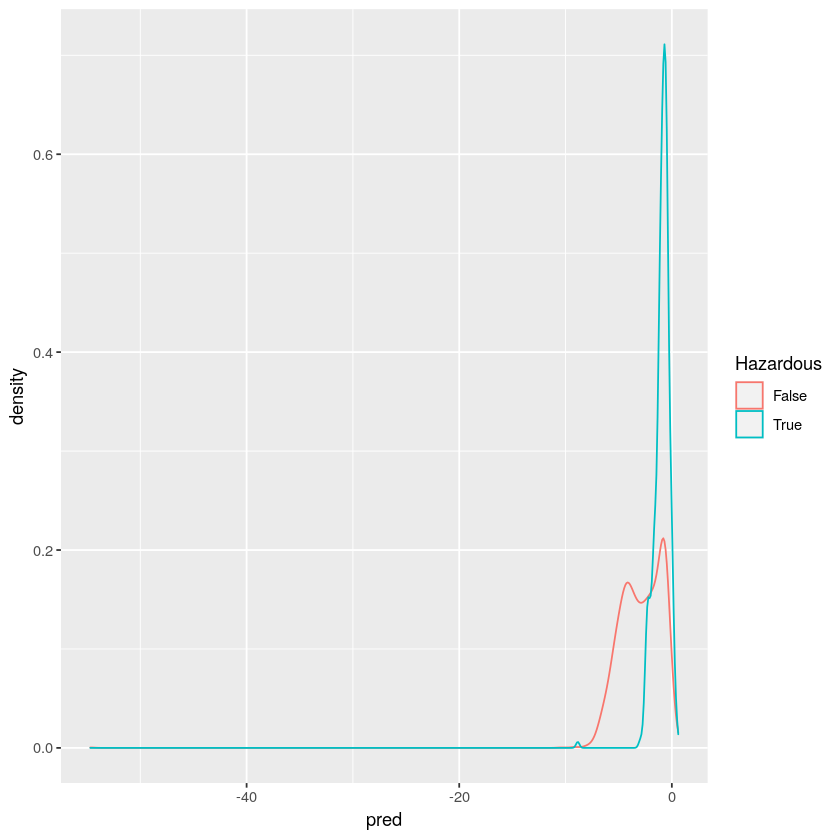

In [63]:
ggplot(df_train, aes(x=pred, color=Hazardous))+geom_density()

Setting levels: control = False, case = True

Setting direction: controls < cases



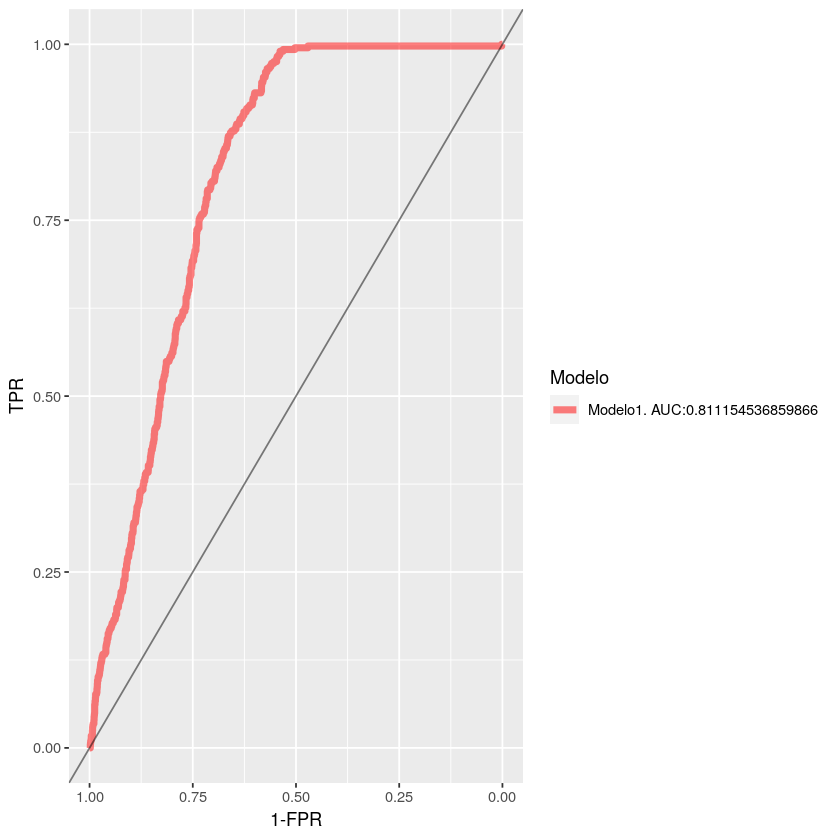

In [64]:
rocobj1 <- pROC::roc(
    df_train$Hazardous,
    df_train$pred)

pROC::ggroc(list(model1=rocobj1), alpha = 0.5, size = 2)+ xlab("1-FPR") + ylab("TPR") +
geom_abline(slope = 1 ,intercept = 1, alpha=0.5) +
  scale_colour_manual(values = c("red",  "#0000FF") ,name="Modelo", 
                      labels=c(paste0("Modelo1. AUC:",pROC::auc(rocobj1))))

Setting levels: control = False, case = True

Setting direction: controls < cases



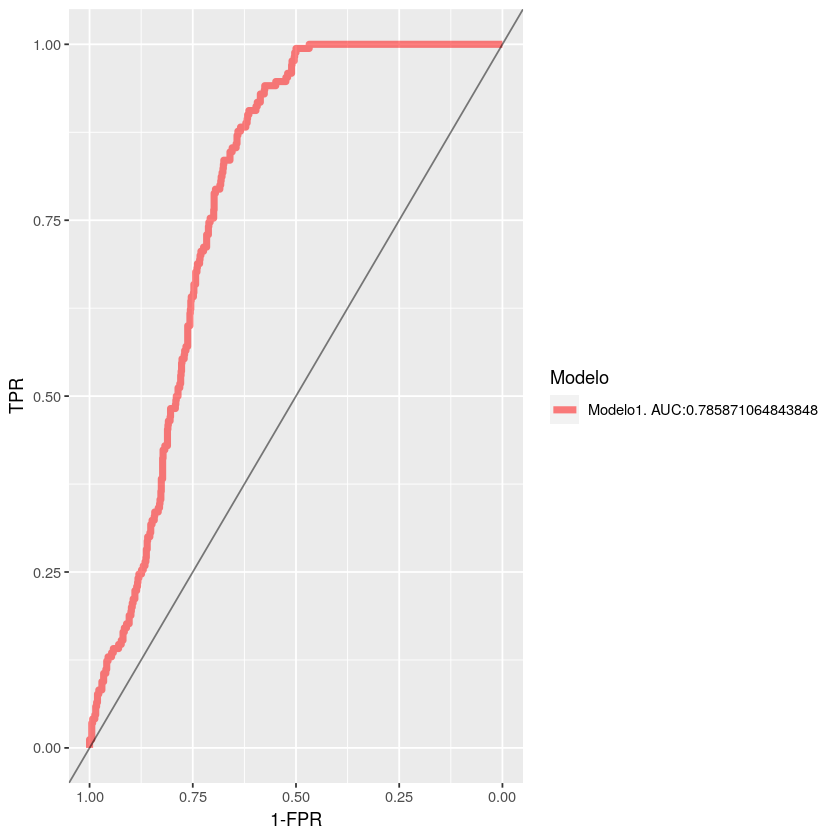

In [65]:
df_test$pred <- predict(model, df_test)

rocobj1 <- pROC::roc(
    df_test$Hazardous,
    df_test$pred)

pROC::ggroc(list(model1=rocobj1), alpha = 0.5, size = 2)+ xlab("1-FPR") + ylab("TPR") +
geom_abline(slope = 1 ,intercept = 1, alpha=0.5) +
  scale_colour_manual(values = c("red",  "#0000FF") ,name="Modelo", 
                      labels=c(paste0("Modelo1. AUC:",pROC::auc(rocobj1))))

In [67]:
model2 <- glm(df_train, 
              formula=Hazardous ~ Absolute.Magnitude+Est.Dia.in.KM.min.+Relative.Velocity.km.per.hr+
    Orbit.Uncertainity+Minimum.Orbit.Intersection+Asc.Node.Longitude+Mean.Anomaly+I(Absolute.Magnitude^2)+
              I(log(Absolute.Magnitude)), family=binomial())
summary(model2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hazardous ~ Absolute.Magnitude + Est.Dia.in.KM.min. + 
    Relative.Velocity.km.per.hr + Orbit.Uncertainity + Minimum.Orbit.Intersection + 
    Asc.Node.Longitude + Mean.Anomaly + I(Absolute.Magnitude^2) + 
    I(log(Absolute.Magnitude)), family = binomial(), data = df_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.784   0.000   0.000   0.000   3.656  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  4.205e+04  5.698e+03   7.379 1.59e-13 ***
Absolute.Magnitude           2.590e+03  3.440e+02   7.530 5.06e-14 ***
Est.Dia.in.KM.min.          -1.317e+02  1.915e+01  -6.878 6.09e-12 ***
Relative.Velocity.km.per.hr  6.671e-06  6.695e-06   0.996   0.3190    
Orbit.Uncertainity          -1.448e-01  8.115e-02  -1.785   0.0743 .  
Minimum.Orbit.Intersection  -2.077e+02  1.967e+01 -10.558  < 2e-16 ***
Asc.Node.Longitude          -4.992e-04  1.713e-03  -0.291   0.7707    
Mean.Anomaly   

Setting levels: control = False, case = True

Setting direction: controls < cases

Setting levels: control = False, case = True

Setting direction: controls < cases



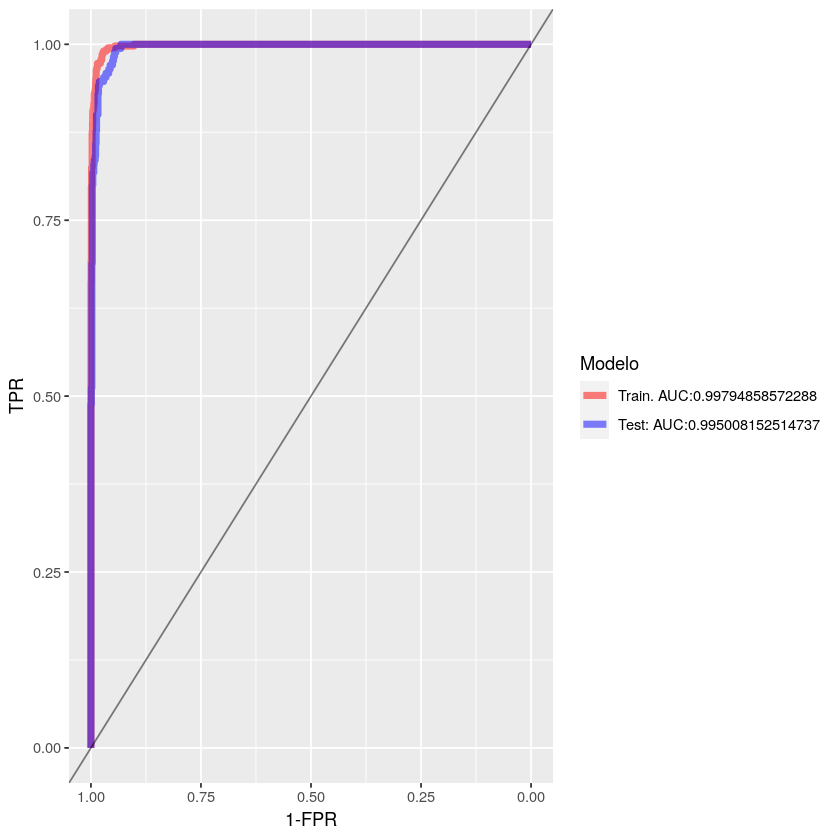

In [70]:
df_train$pred <- predict(model2, df_train)
df_test$pred <- predict(model2, df_test)
rocobj1 <- pROC::roc(
    df_train$Hazardous,
    df_train$pred)

rocobj2 <- pROC::roc(
    df_test$Hazardous,
    df_test$pred)

pROC::ggroc(list(model1=rocobj1, model2=rocobj2), alpha = 0.5, size = 2)+ xlab("1-FPR") + ylab("TPR") +
geom_abline(slope = 1 ,intercept = 1, alpha=0.5) +
  scale_colour_manual(values = c("red",  "#0000FF") ,name="Modelo", 
                      labels=c(paste0("Train. AUC:",pROC::auc(rocobj1)),
                               paste0("Test: AUC:",pROC::auc(rocobj2))))

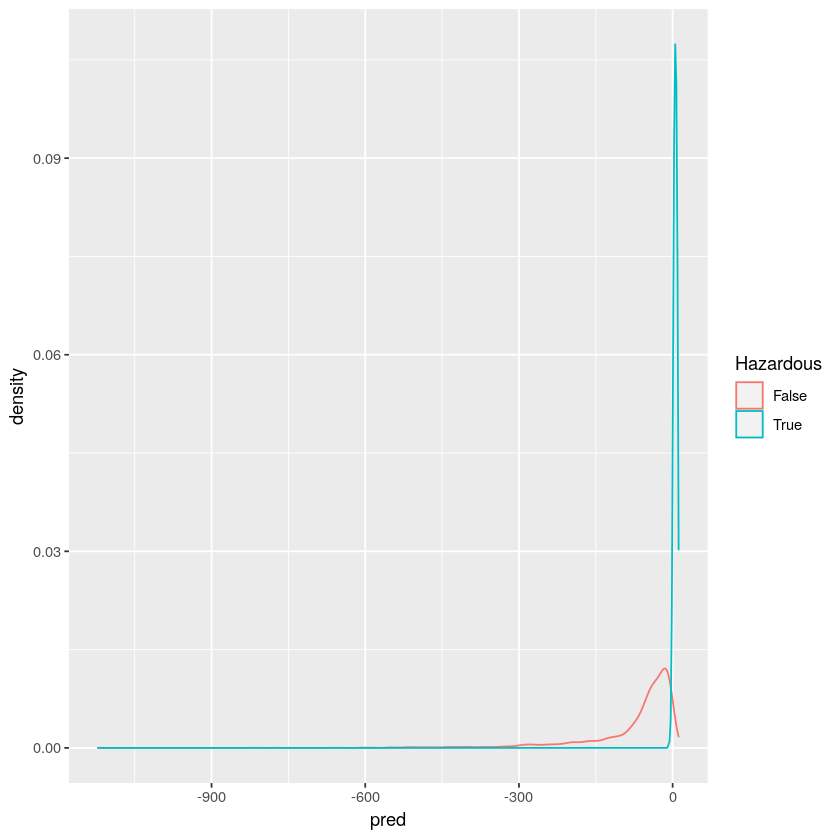

In [71]:
ggplot(df_train, aes(x=pred, color=Hazardous))+geom_density()

In [75]:
table(real=df_train$Hazardous, 
      pred=df_train$pred>0)

       pred
real    FALSE TRUE
  False  2154   24
  True     20  386

In [78]:
table(pred=df_train$pred>0,
      real=df_train$Hazardous)

       real
pred    False True
  FALSE  2154   20
  TRUE     24  386

In [80]:
table(pred=df_train$pred> -2,
      real=df_train$Hazardous)

       real
pred    False True
  FALSE  2107    4
  TRUE     71  402

In [82]:
caret::confusionMatrix(data= factor(df_train$pred> -2, labels=c('False', 'True')), 
                       reference=df_train$Hazardous
                       )

Confusion Matrix and Statistics

          Reference
Prediction False True
     False  2107    4
     True     71  402
                                          
               Accuracy : 0.971           
                 95% CI : (0.9638, 0.9771)
    No Information Rate : 0.8429          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8973          
                                          
 Mcnemar's Test P-Value : 2.517e-14       
                                          
            Sensitivity : 0.9674          
            Specificity : 0.9901          
         Pos Pred Value : 0.9981          
         Neg Pred Value : 0.8499          
             Prevalence : 0.8429          
         Detection Rate : 0.8154          
   Detection Prevalence : 0.8170          
      Balanced Accuracy : 0.9788          
                                          
       'Positive' Class : False           
                     

In [83]:
?caret::confusionMatrix